In [24]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.preprocessing import sequence
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
# fix random seed for reproducibility
np.random.seed(7)

In [34]:
gear2Path = os.path.normpath('Gear2')
gear3Path = os.path.normpath('Gear3')
gear4Path = os.path.normpath('Gear4')
doublePath = os.path.normpath('Double')
pathList = [gear2Path,gear3Path,gear4Path,doublePath]
classDict = {'Gear2':0,'Gear3':1,'Gear4':2,'Double':3}
dataList = []
label = pd.DataFrame()

for p in pathList:
    pPath = os.path.normpath('/Users/mariekorneliusson/documents/AiSports/skate_without_video') + '/' + p
    dirs = os.listdir(pPath)
    for i in range(len(dirs)):
        tempP = pPath + '/' + dirs[i]
        d = pd.read_csv(tempP,low_memory = False)
        label = pd.DataFrame({'label': classDict[p]*np.ones(len(d),)})
        d = d.join(label)
        dataList.append(d)

In [35]:
dataOrder = np.random.choice(len(dataList), size=len(dataList), replace=False)
skiData =  pd.DataFrame()
for i in range(len(dataOrder)):
    dataList[i].t = dataList[i].t + addT
    addT = dataList[i].t[len(dataList[i].t) -1] + 0.02
    skiData = skiData.append(dataList[i])

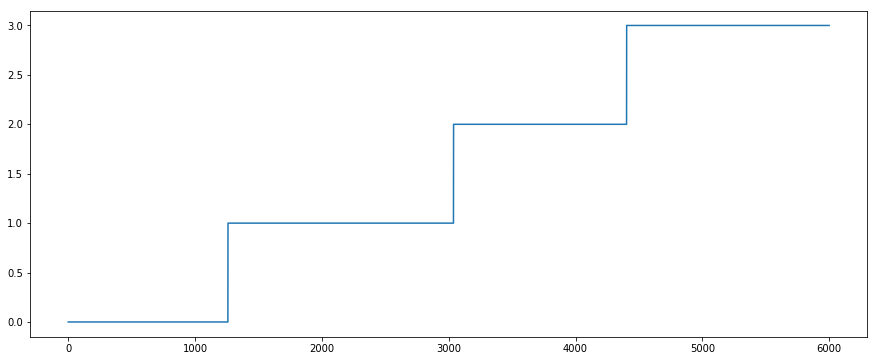

In [7]:
time = np.linspace(0,6000,len(skiData.t))
plt.figure(0,figsize=(15, 6))
plt.plot(time,skiData.label)

In [217]:
print(skiData.head())

      t     fL   thL    w1L    w2L    w3L   a1L   a2L    a3L    fR  ...    \
0  0.00  187.3  55.9 -2.287 -0.352 -0.990  5.10  1.75 -14.21  50.9  ...     
1  0.02  175.0  55.6 -2.302 -0.635 -0.962  5.38  1.78 -15.28  40.0  ...     
2  0.04  162.7  55.3 -2.317 -0.918 -0.933  5.65  1.80 -16.34  28.8  ...     
3  0.06  150.4  54.9 -2.332 -1.201 -0.905  5.92  1.83 -17.41   6.6  ...     
4  0.08  138.0  54.6 -2.347 -1.484 -0.876  6.20  1.85 -18.48   0.2  ...     

     w2R    w3R   a1R    a2R    a3R     x    y     v   vdir  label  
0  3.476 -1.655  7.41  -1.09 -18.34  22.8 -6.5  5.03  128.4    0.0  
1  0.406 -0.675 -0.10  -1.51 -17.57  22.9 -6.6  5.04  128.4    0.0  
2 -2.623 -0.629  2.15   0.88 -17.97  23.0 -6.6  5.05  128.4    0.0  
3 -4.498 -0.593  1.43  13.42 -16.48  23.1 -6.7  5.06  128.4    0.0  
4 -6.825 -0.627 -1.20  25.21 -21.28  23.1 -6.7  5.06  128.4    0.0  

[5 rows x 22 columns]


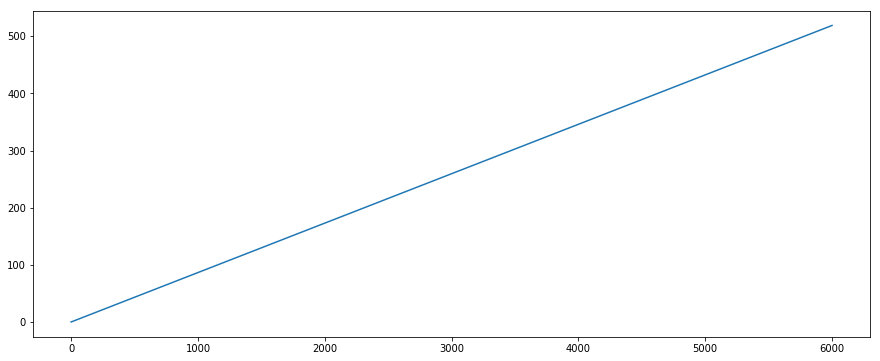

In [8]:
time = np.linspace(0,6000,len(skiData.t))
plt.figure(0,figsize=(15, 6))
plt.plot(time,skiData.t)

Text(0.5,1,'Time seris of force in the right pole')

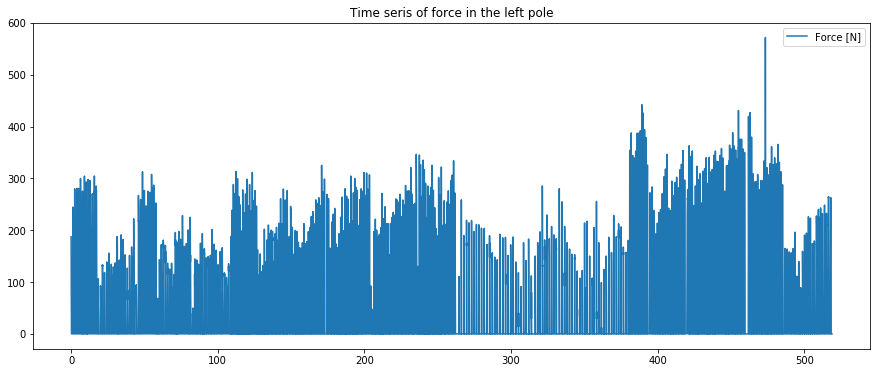

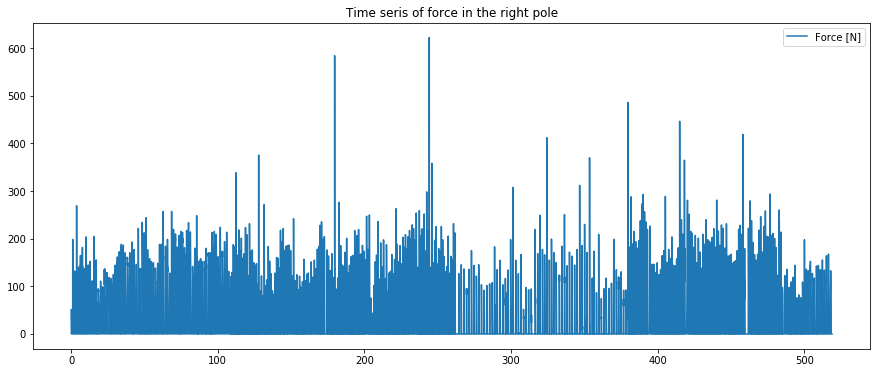

In [9]:
plt.figure(0,figsize=(15, 6))
plt.plot(skiData.t,skiData.fL,label='Force [N]')
plt.legend()
plt.title('Time seris of force in the left pole')
plt.figure(1,figsize=(15, 6))
plt.plot(skiData.t,skiData.fR,label='Force [N]')
plt.legend()
plt.title('Time seris of force in the right pole')

In [10]:
X = skiData.loc[:,'fL':'a3R'].values
Y = pd.get_dummies(skiData['label']).values

In [11]:
nbrSamples = X.shape[0]
dataDimX = X.shape[1]
timesteps = 1
nbrOfClasses = 4
X = X.reshape(nbrSamples,timesteps,dataDimX)
Y = Y.reshape(nbrSamples,timesteps,nbrOfClasses)
trainX, testX, trainY, testY = train_test_split(X, Y, test_size=0.2, random_state=10)
print(trainX.shape)
print(trainY.shape)

(20760, 1, 16)
(20760, 1, 4)


In [12]:
# Input shape of data (nbrSamples,timeSteps=1,features)
model = Sequential()
model.add(LSTM(20,return_sequences=True,input_shape=(timesteps, dataDimX)))
model.add(Dense(nbrOfClasses, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['categorical_accuracy'])

In [13]:
historyFirstModel = model.fit(trainX, trainY, epochs=20, batch_size=100, validation_split=0.25)

Train on 15570 samples, validate on 5190 samples
Epoch 1/20
15570/15570 [==============================] - 2s 146us/step - loss: 1.2978 - categorical_accuracy: 0.3817 - val_loss: 1.1948 - val_categorical_accuracy: 0.4792
Epoch 2/20
15570/15570 [==============================] - 1s 49us/step - loss: 1.1422 - categorical_accuracy: 0.5094 - val_loss: 1.0864 - val_categorical_accuracy: 0.5441
Epoch 3/20
15570/15570 [==============================] - 1s 49us/step - loss: 1.0393 - categorical_accuracy: 0.5681 - val_loss: 0.9931 - val_categorical_accuracy: 0.5954
Epoch 4/20
15570/15570 [==============================] - 1s 48us/step - loss: 0.9481 - categorical_accuracy: 0.6198 - val_loss: 0.9096 - val_categorical_accuracy: 0.6497
Epoch 5/20
15570/15570 [==============================] - 1s 48us/step - loss: 0.8713 - categorical_accuracy: 0.6574 - val_loss: 0.8407 - val_categorical_accuracy: 0.6763
Epoch 6/20
15570/15570 [==============================] - 1s 53us/step - loss: 0.8040 - categor

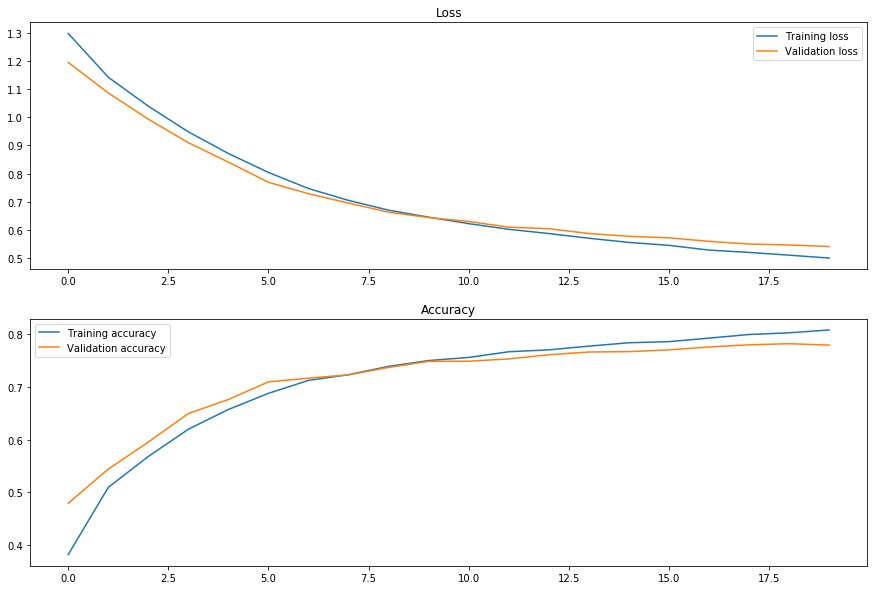

In [14]:
plt.figure(0,figsize=(15, 10))
plt.subplot(2, 1, 1)
plt.plot(historyFirstModel.history['loss'],label = 'Training loss')
plt.plot(historyFirstModel.history['val_loss'],label = 'Validation loss')
plt.title('Loss')
plt.legend()
plt.subplot(2, 1, 2)
plt.plot(historyFirstModel.history['categorical_accuracy'],label = 'Training accuracy')
plt.plot(historyFirstModel.history['val_categorical_accuracy'],label = 'Validation accuracy')
plt.title('Accuracy')
plt.legend()

In [15]:
predY = model.predict(testX)

yTestClass = np.argmax(testY, axis=1)
yPredClass = np.argmax(predY, axis=1)

acc = accuracy_score(yTestClass, yPredClass)
print("Accuracy: %.2f" % acc)

Accuracy: 1.00
